# Milestone 1 Phase 2

## 1. Introduction


Name : Franciscus Andrew Sunanda

Batch : FTDS-018-RMT

Dataset : Internet Service Provider Customer Churn

Objective : To create a model that can predict whether a customers will churn or not

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

## 3. Data Loading

In [2]:
df = pd.read_csv('churn.csv')
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [3]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Here is what the content of each columns specify in this dataset:

---
Column | Description
---|---
`user_id` | ID of a customer
`age` | Age of a customer
`gender` | Gender of a customer
`region_category` | Region that a customer belongs to
`membership_category` | Category of the membership that is using
`joining_date` | Date when a customer became a member
`joined_through_referral` | Wherher a customer joined using any referral code or ID
`preferred_offer_types` | Type of offer that a customer prefers
`medium_of_operation` | Medium of operation that a customer uses for transactions
`internet_option` | Type of internet service a customer uses
`last_visit_time` | The last time a customer visited the website
`days_since_last_login` | Number of days since a customer last logged into the website
`avg_time_spent` | Average time spent by a customer on the website
`avg_transaction_value` | Average transaction value of a customer
`avg_frequency_login_days` | Number of times a customer has logged in to the website
`points_in_wallet` | Points awarded to a customer on each transaction
`used_special_discount` | Whether a customer uses special discounts offered
`offer_application_preference` | Whether a customers prefers offers
`past_complaint` | Whether a customer has raised any complaints
`complaint_status` | Whether the complaints raised by a customer was resolved
`feedback` | Feedback provided by a customer
`churn_risk_score` | Churn Score (0 = Not Churn, 1 = Churn)




## 4. Exploratory Data Analysis

### Checking Duplicated Data and Cardinality

In [5]:
# Copy DF ke variable baru `data`

data = df.copy()
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [6]:
# Checking Duplicated Data
data.duplicated().value_counts()

False    36992
True        18
dtype: int64

In [7]:
# Checking whether the 7 Duplicated Data stated in the cell above rightly duplicated

data[data.duplicated(keep=False)]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1035,854f5d6d5d9204d3,55,F,Town,Premium Membership,2015-08-07,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,1465.940000,73063.54,18.0,838.900000,Yes,Yes,No,Not Applicable,User Friendly Website,0
1546,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
7062,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
7547,b36a10c24eab4cb0,44,M,Town,Silver Membership,2016-06-29,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,805.150000,45635.76,24.0,701.860000,No,Yes,Yes,No Information Available,Poor Customer Service,0
8807,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
9092,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,...,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0
9248,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
9856,b1074e2baf6845ce,17,M,City,Platinum Membership,2015-09-06,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,40.950000,8759.38,29.0,713.060000,No,Yes,Yes,Unsolved,Poor Customer Service,0


In [8]:
# Looks like there are 7 duplicated data as shown above have the exact carbon copy of the data in other rows, so let's drop those 7 duplicated data

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
# Cek Cardinality
for loop in data.keys():
    print('Cardinality : ', data[loop].nunique(),'[',loop,']')

Cardinality :  36992 [ user_id ]
Cardinality :  55 [ age ]
Cardinality :  2 [ gender ]
Cardinality :  3 [ region_category ]
Cardinality :  6 [ membership_category ]
Cardinality :  1096 [ joining_date ]
Cardinality :  2 [ joined_through_referral ]
Cardinality :  3 [ preferred_offer_types ]
Cardinality :  3 [ medium_of_operation ]
Cardinality :  3 [ internet_option ]
Cardinality :  30101 [ last_visit_time ]
Cardinality :  27 [ days_since_last_login ]
Cardinality :  24243 [ avg_time_spent ]
Cardinality :  36894 [ avg_transaction_value ]
Cardinality :  971 [ avg_frequency_login_days ]
Cardinality :  23564 [ points_in_wallet ]
Cardinality :  2 [ used_special_discount ]
Cardinality :  2 [ offer_application_preference ]
Cardinality :  2 [ past_complaint ]
Cardinality :  5 [ complaint_status ]
Cardinality :  9 [ feedback ]
Cardinality :  2 [ churn_risk_score ]


### Balance / Imbalance Classification

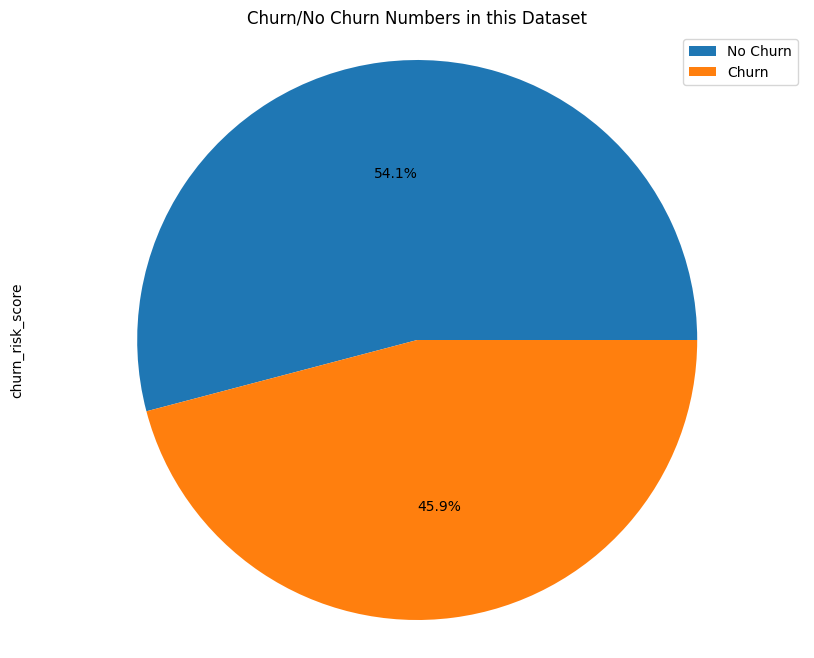

In [10]:
churn = data['churn_risk_score'].value_counts()

churn.plot(kind='pie',
        figsize=(10, 8),
        autopct='%1.1f%%', # untuk membuat persentase  
        labels=None,
        )

plt.title('Churn/No Churn Numbers in this Dataset')
plt.axis('equal') 
plt.legend(labels=['No Churn', 'Churn'])

plt.show()

Looks like in this dataset, for classification is already quite balanced between the two possible outcomes

### Complaints

I personally think that if someone have had a complaint beforehand will make them more likely to churn or not return to use our service anymore. Let's check if my assumption is true or not

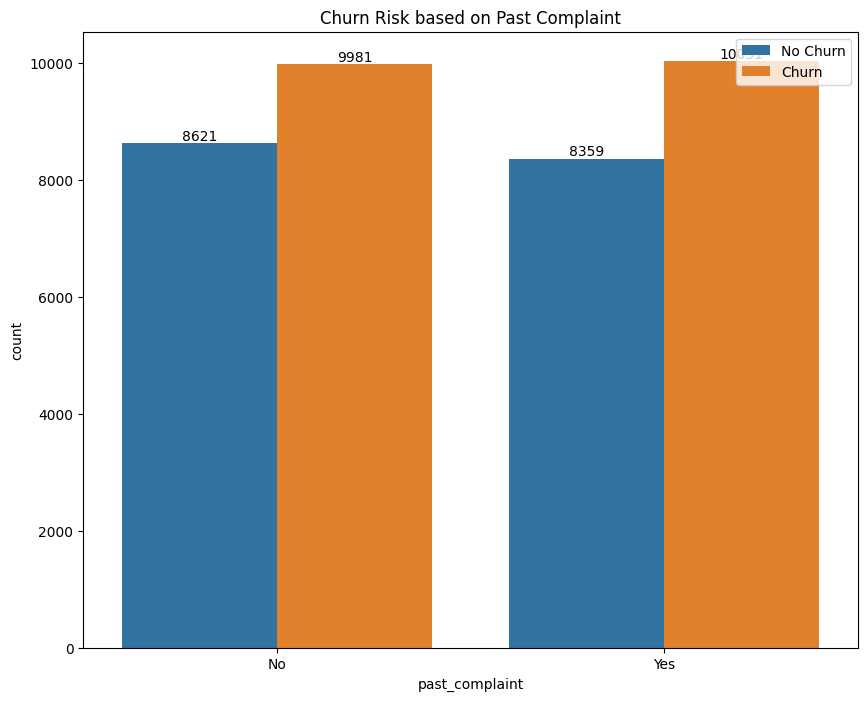

In [11]:
complaint = data.groupby(['churn_risk_score', 'past_complaint']).size().reset_index(name='count')
plt.figure(figsize=(10,8))
ax = sns.barplot(x='past_complaint', y='count', data=complaint, hue='churn_risk_score')
plt.title('Churn Risk based on Past Complaint')
for i in ax.containers:
    ax.bar_label(i,)  
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Churn', 'Churn'], loc='upper right')
plt.show()

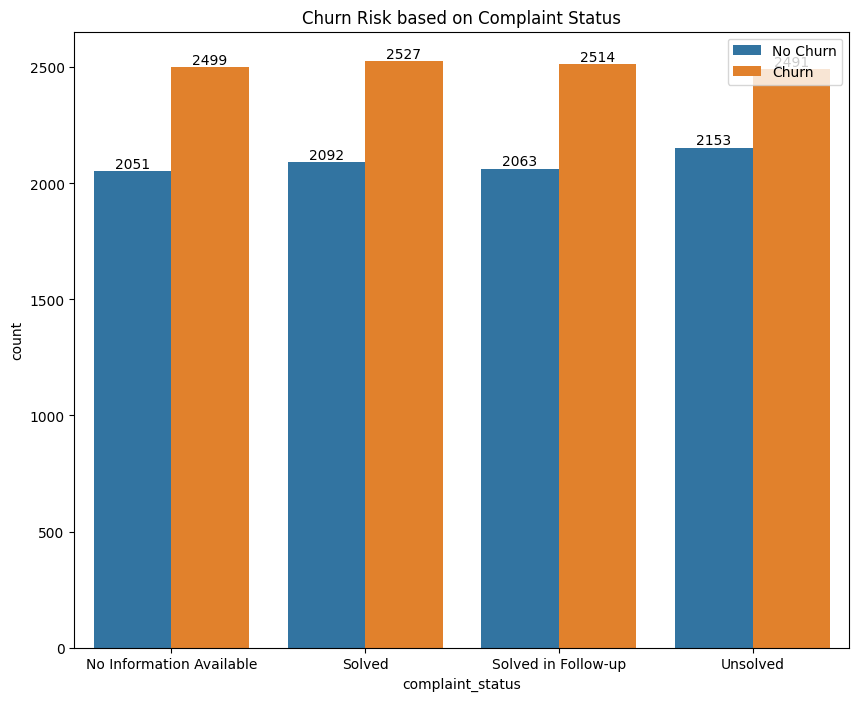

In [12]:
status = data[data['past_complaint'] == 'Yes'].groupby(['churn_risk_score','complaint_status']).size().reset_index(name='count')
plt.figure(figsize=(10,8))
ax = sns.barplot(x='complaint_status', y='count', data=status, hue='churn_risk_score')
plt.title('Churn Risk based on Complaint Status')
for i in ax.containers:
    ax.bar_label(i,)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Churn', 'Churn'], loc='upper right')
plt.show()

It looks like the assumption that I made before turns out to be wrong. As we can see in these  2 plots above, I first checked if a user have submitted a complaint in the past and it doesn't really affect whether a customer turned out to be churn or no churn.

Then I was curious, maybe the status of their complaints can tell more about their churning. I assumed thast iif their complaints got solved then maybe the won't churn. Instead what I found that it also doesn;t matter whether the complaints got solved or unsolved as they all have similiar percentages when it comes to the user churn

### Feedback

Now that we know that both complaint and their status doesn't really affect a customer churning, I want to check their feedback as it can show us what possibly make the users decide to churn

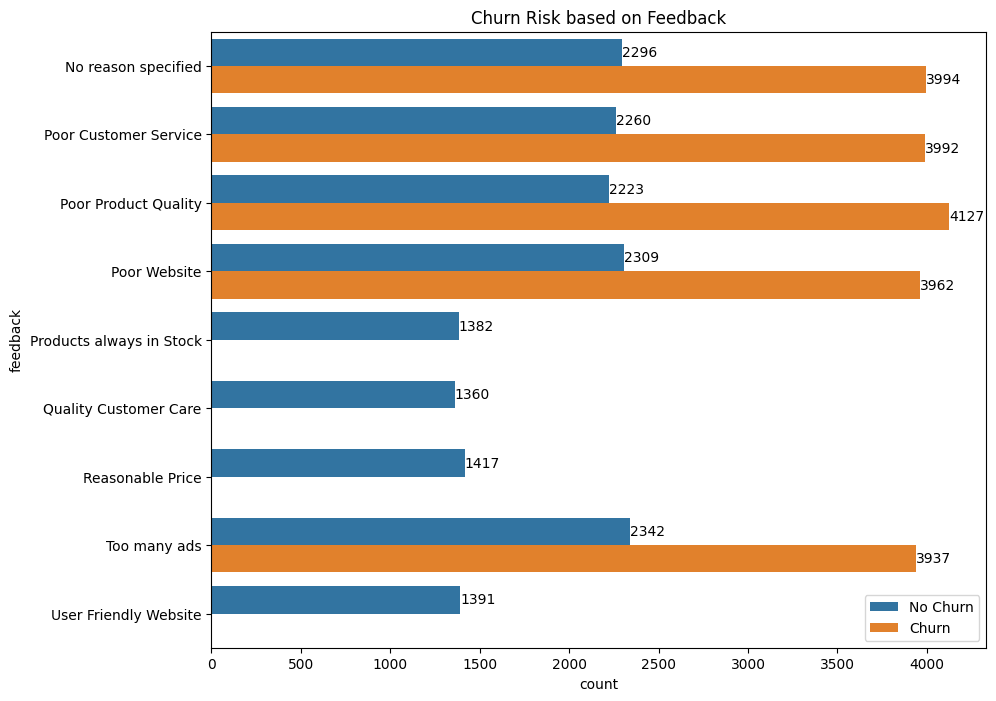

In [13]:
feedback = data.groupby(['churn_risk_score', 'feedback']).size().reset_index(name='count')
plt.figure(figsize=(10,8))
ax = sns.barplot(x='count', y='feedback', data=feedback, hue='churn_risk_score')
plt.title('Churn Risk based on Feedback')
for i in ax.containers:
    ax.bar_label(i,)  
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Churn', 'Churn'], loc='lower right')
plt.show()

It does look like their feedback matters and we can see some of their reasons for churning. Out of all feedback there are 4 Positive Feedback Category that ensure our customer doesn't end up churning. While some feedback such as Poor Customer Service, Poor Product Quality, Poor Website, and Too many Ads makes more than 50% of our customers churning as we can see from previous plot. There are also 3870 customers that didn't give any feedback so we don't really know their reasonin in churning/staying with our services

### Membership

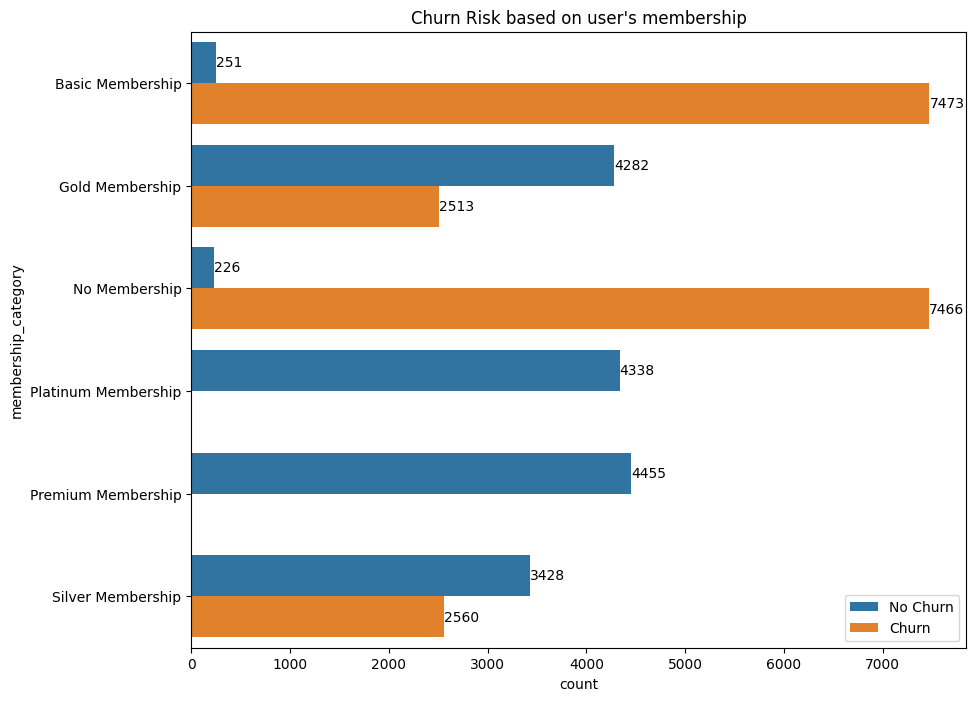

In [14]:
membership = data.groupby(['churn_risk_score', 'membership_category']).size().reset_index(name='count')
plt.figure(figsize=(10,8))
ax = sns.barplot(x='count', y='membership_category', data=membership, hue='churn_risk_score')
plt.title("Churn Risk based on user's membership")
for i in ax.containers:
    ax.bar_label(i,)  
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Churn', 'Churn'], loc='lower right')
plt.show()

From the plot above, we can conclude that only user with Basic Membership, or No Membership at all, have a high risk of churning. While we don't have any of our Premium and Platinum member churning, the Silver and Gold member still have a high chance that they will churn, albeit below 50%.

Unfortunately if we look closely, the majority of our our customers (nearly 50%) are user that doesn't have Membership or does have Basic Membership and nearly all of them churning.

### Internet Services that used by customers

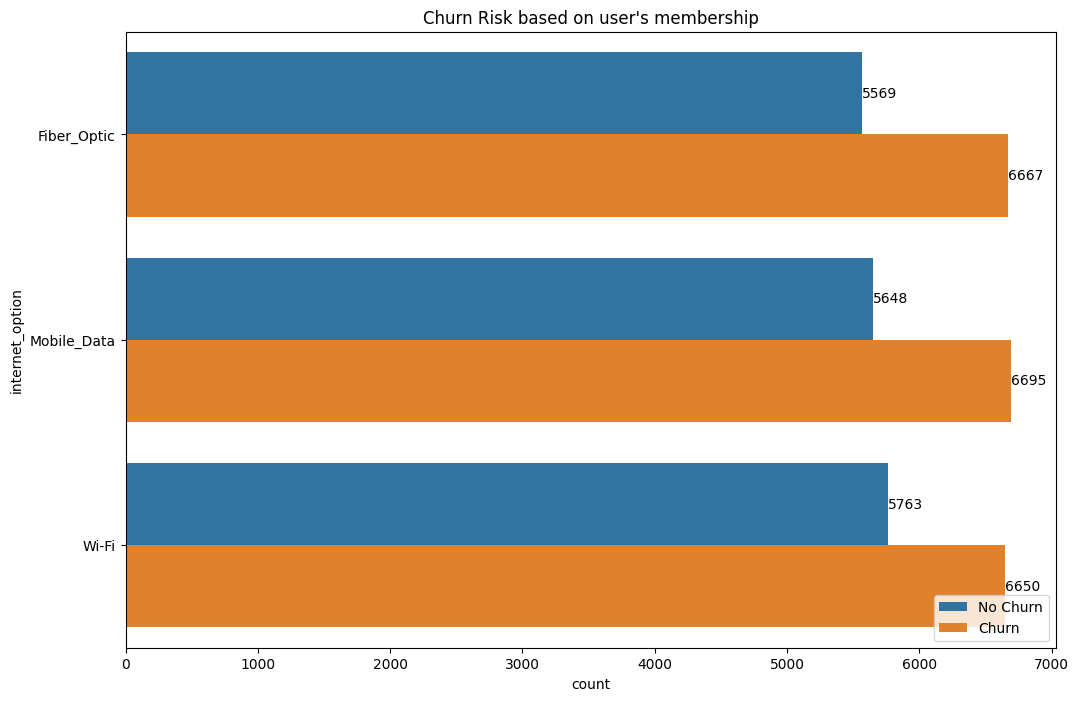

In [15]:
service = data.groupby(['internet_option','churn_risk_score']).size().reset_index(name='count')
plt.figure(figsize=(12,8))
ax = sns.barplot(x='count', y='internet_option', data=service, hue='churn_risk_score')
plt.title("Churn Risk based on user's membership")
for i in ax.containers:
    ax.bar_label(i,)  
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Churn', 'Churn'], loc='lower right')
plt.show()

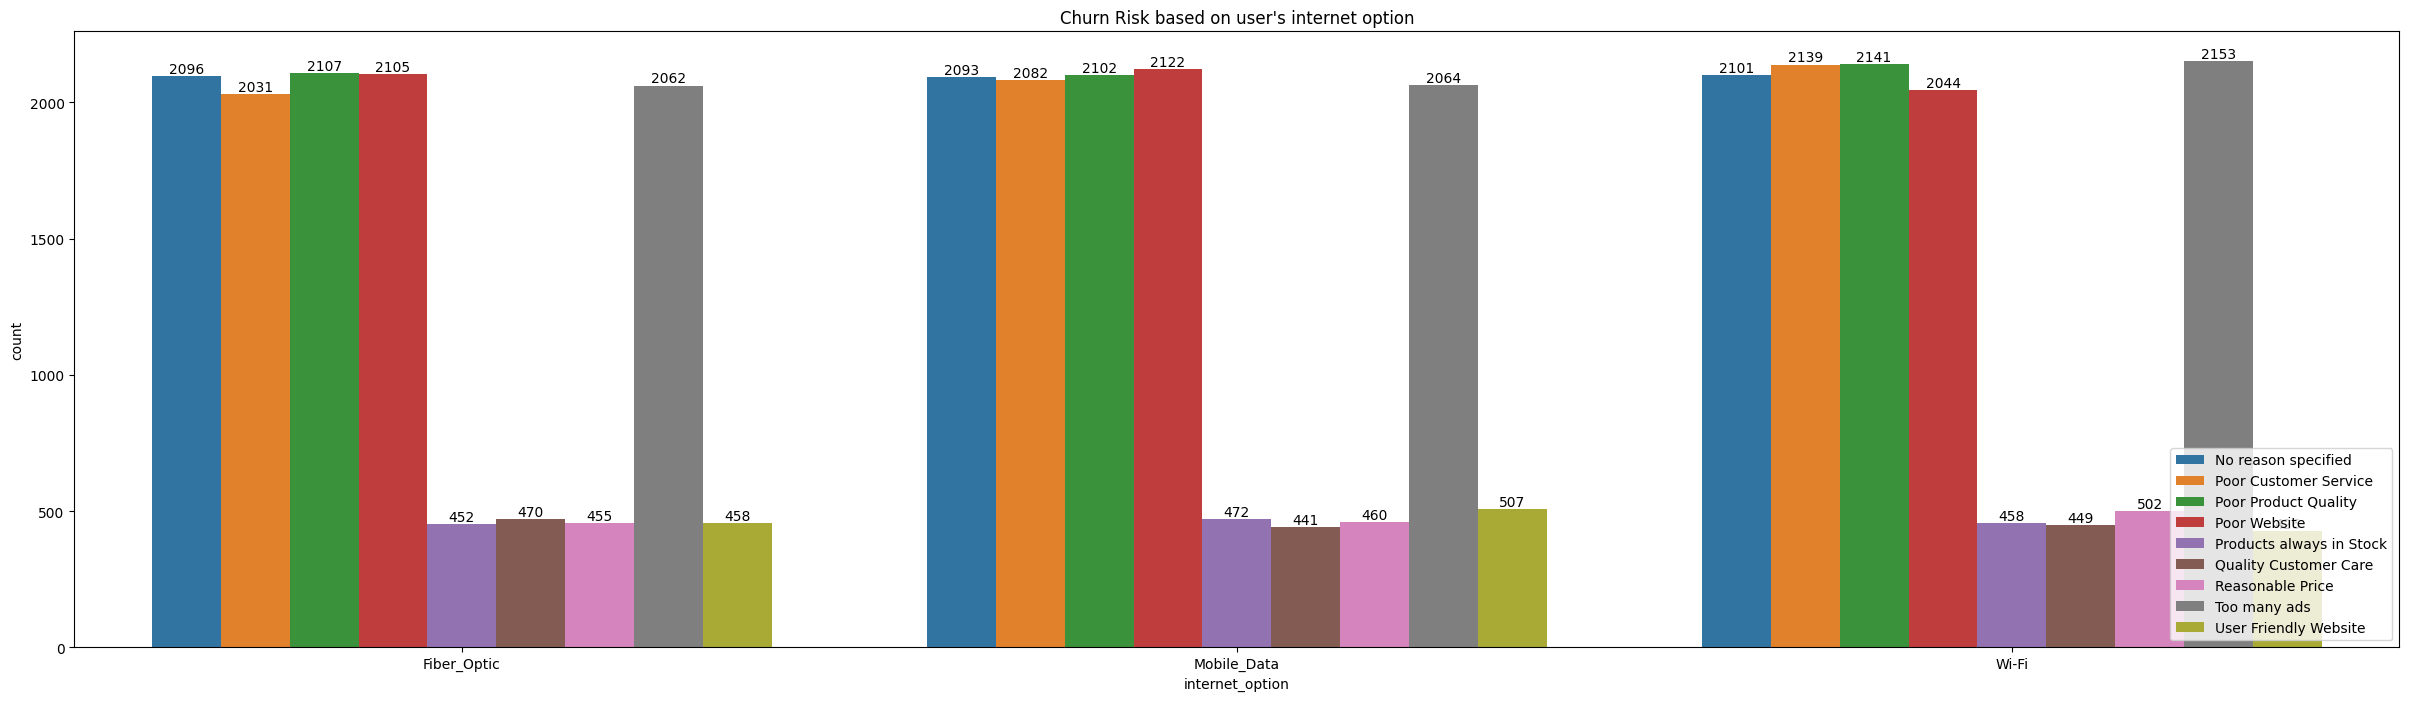

In [16]:
service = data.groupby(['internet_option','feedback']).size().reset_index(name='count')
plt.figure(figsize=(30,8))
ax = sns.barplot(x='internet_option', y='count', data=service, hue='feedback')
plt.title("Churn Risk based on user's internet option")
for i in ax.containers:
    ax.bar_label(i,)  
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles,loc='lower right')
plt.show()

The 3 type of services that we provide all have similar amount of customer churning, and from the feedback we can see that they are all equal in receiveng both the good and bad feedback

## 5. Feature Engineering

### Split between X(features) and y(target)

In [17]:
# Splitting between `X` and `y`

X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

### Split between Train, Validation, and Test Set

In [18]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26726, 21)
Val Size :  (4717, 21)
Test Size :  (5549, 21)


### Handling Missing Value

In [19]:
# Checking Missing Value on X_train
X_train.isna().sum()

user_id                            0
age                                0
gender                            42
region_category                 3921
membership_category                0
joining_date                       0
joined_through_referral         3938
preferred_offer_types            211
medium_of_operation             3914
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [20]:
# Checking Missing Value on X_val
X_val.isna().sum()

user_id                           0
age                               0
gender                            4
region_category                 697
membership_category               0
joining_date                      0
joined_through_referral         701
preferred_offer_types            38
medium_of_operation             682
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [21]:
# Checking Missing Value on X_test
X_test.isna().sum()

user_id                           0
age                               0
gender                           13
region_category                 810
membership_category               0
joining_date                      0
joined_through_referral         799
preferred_offer_types            39
medium_of_operation             797
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [22]:
X_train[X_train.isna().any(axis=1)]


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
19489,8cfb573dfff943c0,49,M,Town,No Membership,2017-02-28,Yes,Without Offers,NaN,Fiber_Optic,...,14,766.91,47215.70,28.0,609.210000,Yes,No,Yes,Solved,Poor Website
11620,bebef4c3d9919748,22,M,Town,Basic Membership,2017-04-22,NaN,Without Offers,Desktop,Fiber_Optic,...,13,79.64,18100.45,6.0,0.000000,No,Yes,Yes,No Information Available,Poor Website
34648,a81fff6932612dac,25,F,City,Silver Membership,2015-08-20,NaN,Without Offers,NaN,Mobile_Data,...,13,135.21,3561.26,17.0,0.000000,Yes,No,Yes,Solved,Too many ads
20088,b1101c91b7b401d3,21,F,NaN,Premium Membership,2016-09-04,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,14,33.76,16656.88,5.0,739.850000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service
17126,a61549f2a0404144,29,M,NaN,No Membership,2015-08-17,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,-999,88.50,4264.88,26.0,28.170888,Yes,No,No,Not Applicable,Too many ads
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36966,812733c3a0c09f82,63,M,NaN,Gold Membership,2015-02-27,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,10,360.36,56919.32,7.0,763.490000,No,Yes,Yes,Unsolved,Reasonable Price
208,90a1bf6ed0f22010,55,M,NaN,Basic Membership,2016-02-20,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,4,39.89,12486.23,19.0,513.010000,No,Yes,No,Not Applicable,No reason specified
13866,b3b53209564bee53,12,F,Town,Gold Membership,2015-08-07,NaN,Without Offers,NaN,Mobile_Data,...,18,156.27,15097.49,23.0,788.120000,No,Yes,Yes,Unsolved,Too many ads
31007,b20fa8973eb0917a,21,M,NaN,Basic Membership,2015-08-16,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,19,32.68,29867.78,28.0,639.620000,No,Yes,Yes,Solved,Poor Customer Service


Looks like the data is missing completely at random (MCAR) so we will handle it with Mode imputation as it is all categorical data that went missing

In [23]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
imputer = SimpleImputer(strategy='most_frequent')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

In [24]:
X_train[num_columns] = X_train[num_columns].astype(float)
X_val[num_columns] = X_val[num_columns].astype(float)
X_test[num_columns] = X_test[num_columns].astype(float)



### Handling Outlier

In [25]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Cat Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [26]:
# Create function to see Outliers and Data Distribution
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

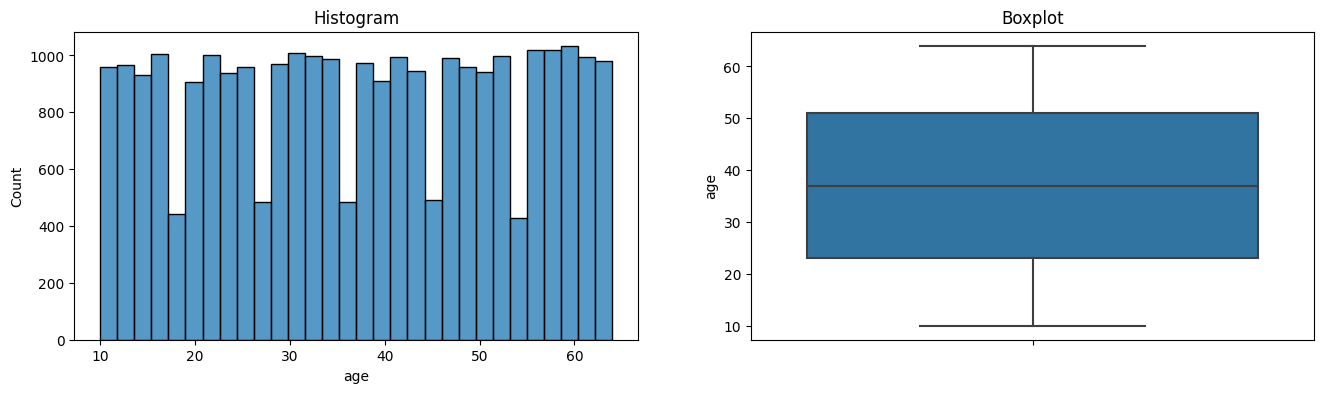

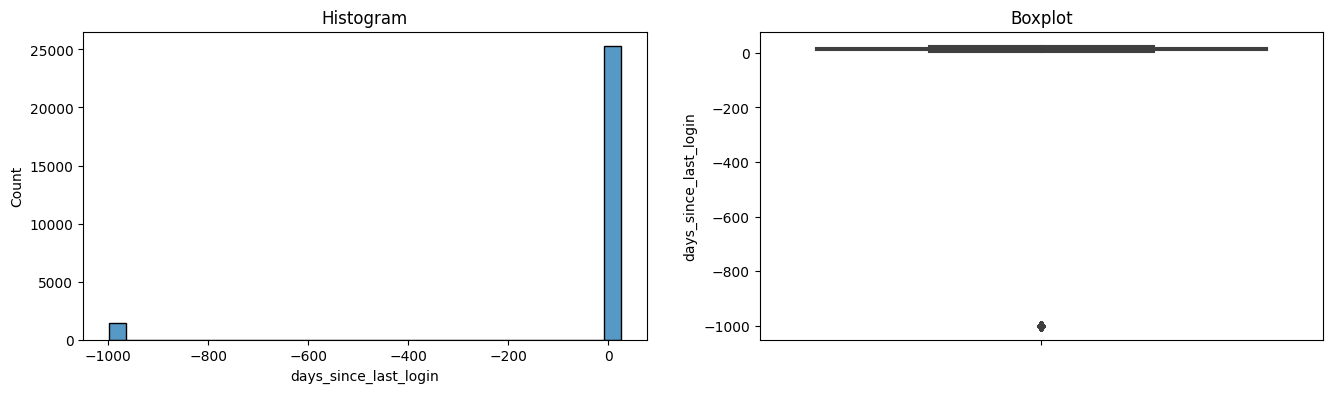

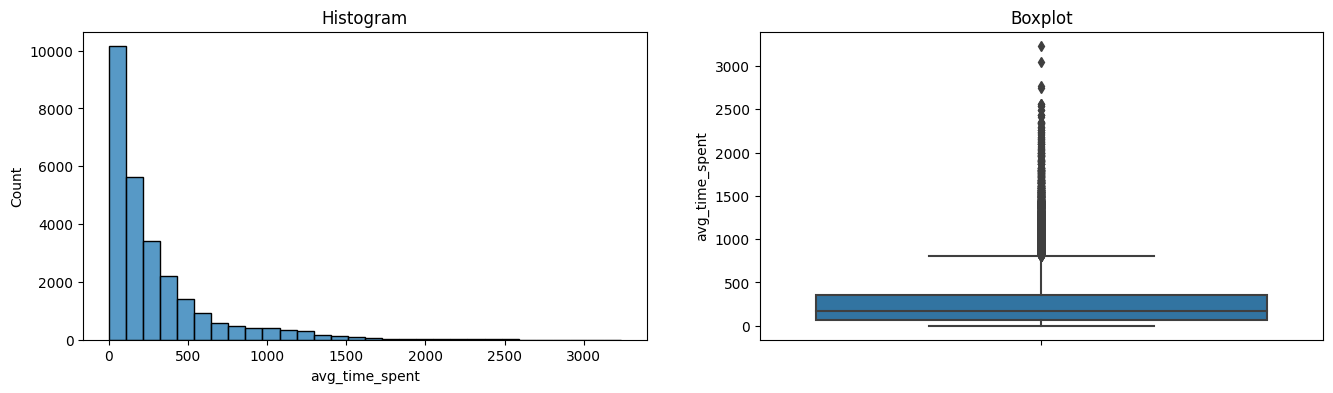

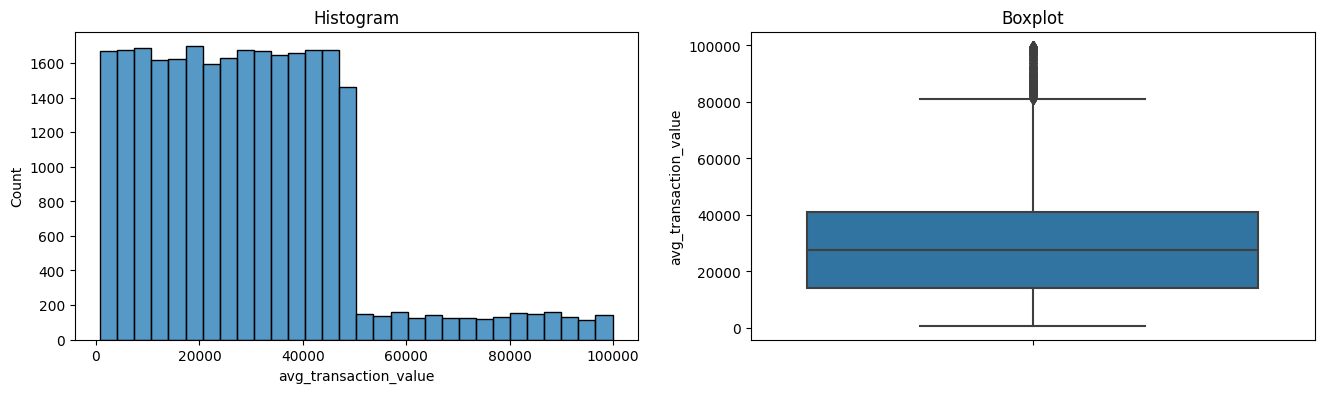

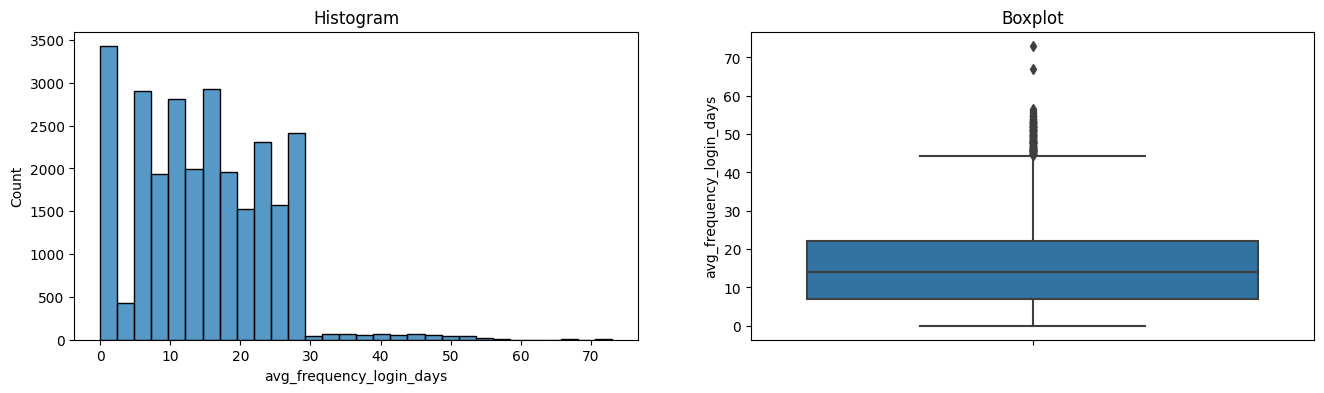

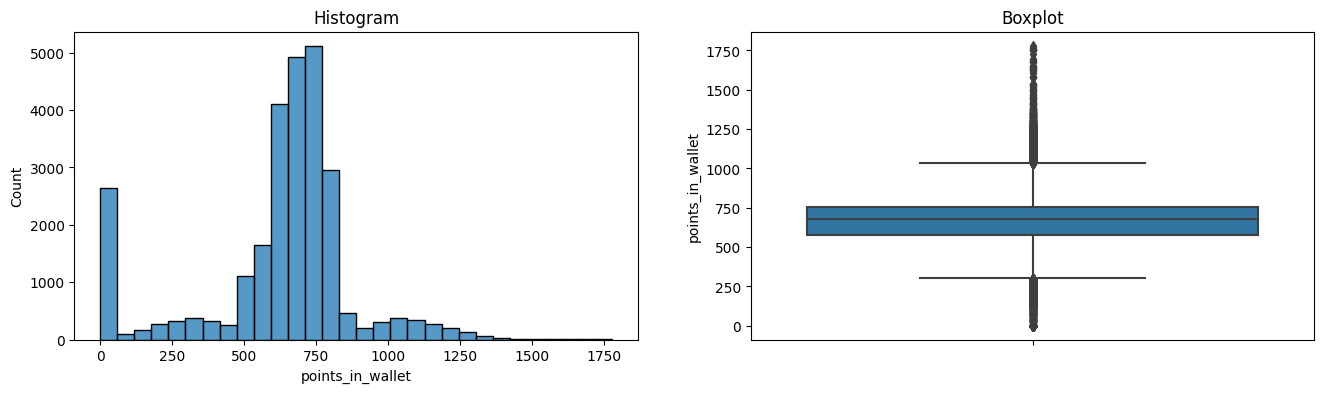


Skewness Value :  age                        -0.012318
days_since_last_login      -3.935341
avg_time_spent              2.246324
avg_transaction_value       1.007406
avg_frequency_login_days    0.394143
points_in_wallet           -0.784338
dtype: float64


In [27]:
for cek in X_train[num_columns]:
    diagnostic_plots(X_train, cek)

print('\nSkewness Value : ', X_train[num_columns].skew())


I think that all this data should be valid and not considered as outlier, but as for in `days_since_last_login` columns, I feel like that it there should not be any value below 0 as it is impossible to be minus value in that columns, so I will change them all minus value to 0 instead

In [28]:
X_train[X_train['days_since_last_login'] < 0]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
7,a61549f2a0404144,29.0,M,Town,No Membership,2015-08-17,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,-999.0,88.50,4264.88,26.0,28.170888,Yes,No,No,Not Applicable,Too many ads
12,94ae8fe6cd0af9aa,43.0,F,City,Basic Membership,2016-10-16,Yes,Without Offers,Desktop,Fiber_Optic,...,-999.0,962.10,6964.52,27.0,1005.134577,Yes,No,Yes,Solved,No reason specified
25,9a35153ffb4b2535,24.0,M,Town,Silver Membership,2015-01-06,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,-999.0,197.94,21549.33,26.0,794.720000,Yes,No,Yes,Solved,Too many ads
37,910a4abd1c221a24,12.0,F,City,Platinum Membership,2015-11-02,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,-999.0,229.96,9631.39,22.0,768.730000,Yes,No,Yes,No Information Available,Poor Website
62,b8f8f7169a7a4289,39.0,F,Town,No Membership,2017-05-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,-999.0,131.76,25715.77,29.0,0.000000,Yes,No,No,Not Applicable,Too many ads
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26669,800078d741f525fe,23.0,M,City,No Membership,2015-01-27,No,Credit/Debit Card Offers,Desktop,Mobile_Data,...,-999.0,142.61,5368.41,0.0,638.200000,Yes,No,No,Not Applicable,Poor Customer Service
26705,9110d42c1a440c4a,16.0,F,Village,Platinum Membership,2015-01-05,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,-999.0,291.69,15734.17,10.0,776.300000,Yes,No,Yes,No Information Available,Poor Product Quality
26709,a2ffb492968c16b3,59.0,F,Town,Premium Membership,2017-02-09,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,-999.0,30.55,34747.31,9.0,756.510000,Yes,No,Yes,Solved in Follow-up,Poor Website
26719,a3ff9f83a12d1cda,22.0,F,Town,Silver Membership,2016-10-23,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,-999.0,146.04,12079.77,26.0,704.070000,No,Yes,No,Not Applicable,Poor Website


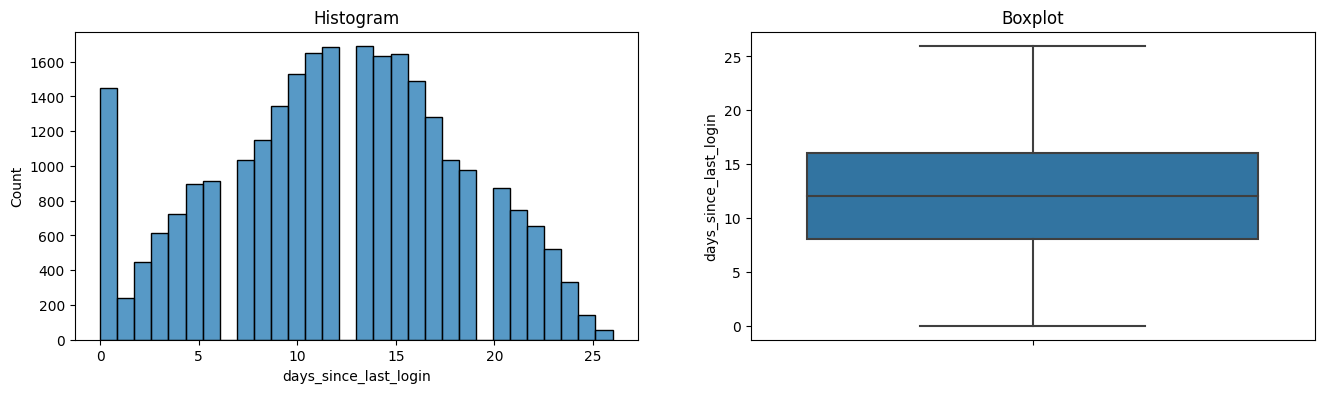


Skewness Value :  -0.12782418437632845


In [29]:
X_train.loc[X_train['days_since_last_login'] < 0, 'days_since_last_login'] = 0
diagnostic_plots(X_train, 'days_since_last_login')
print('\nSkewness Value : ', X_train['days_since_last_login'].skew())

### Features Selection

In [30]:
X_train.keys()

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In my opinion user id, joining date, joined through referral, and last visit time doesn't have strong correlation to user churning so I will not use those as features

User ID: This feature is unique for each user and does not provide any meaningful information for churn prediction.

As for joining date and joined through referral is shown by tables below that it doesn't really determines whether someone churn or not

In [31]:
# Create a contingency table for joined_through_referral vs. churn
contingency_table = pd.crosstab(data['joined_through_referral'], data['churn_risk_score'])

# Print the contingency table
print(contingency_table)

churn_risk_score            0     1
joined_through_referral            
No                       7576  8263
Yes                      6952  8763


In [32]:
# Create a contingency table for joining_date vs. churn
contingency_table = pd.crosstab(data['joining_date'], data['churn_risk_score'])

# Print the contingency table
print(contingency_table)

churn_risk_score   0   1
joining_date            
2015-01-01         7  19
2015-01-02        14  15
2015-01-03        21  16
2015-01-04        18  17
2015-01-05        22  25
...               ..  ..
2017-12-27        21  12
2017-12-28        11  14
2017-12-29        18  19
2017-12-30        13  18
2017-12-31        18  23

[1096 rows x 2 columns]


In [33]:
# Create a contingency table for last_visit_time vs. churn
contingency_table = pd.crosstab(data['last_visit_time'], data['churn_risk_score'])

# Print the contingency table
print(contingency_table)

churn_risk_score  0  1
last_visit_time       
00:00:00          1  0
00:00:02          0  1
00:00:03          0  1
00:00:04          0  1
00:00:05          0  1
...              .. ..
23:59:52          1  1
23:59:55          1  1
23:59:56          0  1
23:59:58          1  0
23:59:59          0  1

[30101 rows x 2 columns]


In [34]:
X_train.drop(['user_id', 'joining_date', 'joined_through_referral','last_visit_time'], axis=1, inplace=True)
X_val.drop(['user_id', 'joining_date', 'joined_through_referral','last_visit_time'], axis=1, inplace=True)
X_test.drop(['user_id', 'joining_date', 'joined_through_referral','last_visit_time'], axis=1, inplace=True)

### Pipeline

In [35]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['gender', 'region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [36]:
# Create A Pipeline

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [37]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [38]:
X_train.shape

(26726, 46)

In [39]:
# Create Tensorflow Pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(5).batch(10)
test_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(10)
val_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(10)



## 6. Model Definition

### Sequential API

In [40]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(8, activation='relu', input_shape=(46,))) # Hidden Layer 1
model_sequential.add(Dense(2, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=[tf.keras.metrics.Recall()])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 376       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


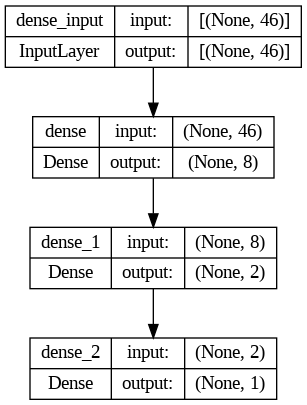

In [41]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

### Functional API

In [42]:
# Create Functional Model
input_layer = Input(shape=(46,))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(8, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(4, activation='relu')(hidden_layer_2)

concat_layer = concatenate([hidden_layer_1, hidden_layer_3])
hidden_layer_4 = Dense(2, activation='relu')(concat_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=[tf.keras.metrics.Recall()])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           1504        ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 8)            264         ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 4)            36          ['dense_4[0][0]']                
                                                                                              

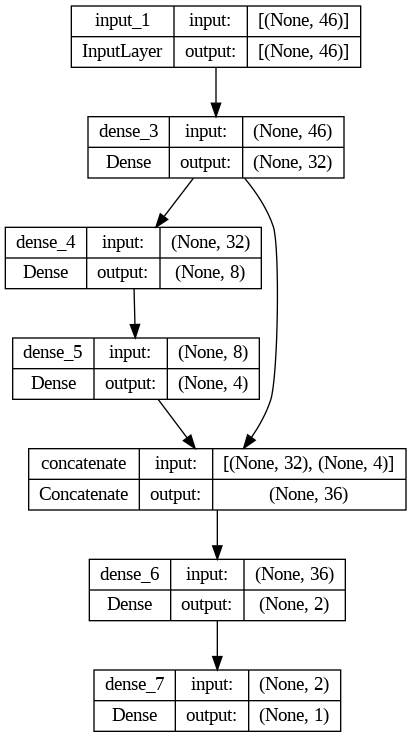

In [43]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 7. Model Training

### Sequential API

In [44]:
# Define callback early stop

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [45]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe),
                                   callbacks=[early_stop])

Epoch 1/50
2673/2673 [==============================] - 22s 6ms/step - loss: 0.3805 - recall: 0.8585 - val_loss: 0.2596 - val_recall: 0.8160
Epoch 2/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2580 - recall: 0.8673 - val_loss: 0.2537 - val_recall: 0.8327
Epoch 3/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2539 - recall: 0.8835 - val_loss: 0.2508 - val_recall: 0.8513
Epoch 4/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2519 - recall: 0.8949 - val_loss: 0.2496 - val_recall: 0.8663
Epoch 5/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2510 - recall: 0.9000 - val_loss: 0.2491 - val_recall: 0.8704
Epoch 6/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2504 - recall: 0.9025 - val_loss: 0.2485 - val_recall: 0.8771
Epoch 7/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2499 - recall: 0.9040 - val_loss: 0.2480 - val_recall: 0.8816
Epoch 8/50
26

### Functional API

In [46]:
# Train the Model

%%time
history_fun = model_functional.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe),
                                   callbacks=[early_stop])

Epoch 1/50
2673/2673 [==============================] - 18s 6ms/step - loss: 0.4030 - recall_1: 0.8321 - val_loss: 0.3195 - val_recall_1: 0.7937
Epoch 2/50
2673/2673 [==============================] - 15s 6ms/step - loss: 0.2991 - recall_1: 0.8445 - val_loss: 0.2804 - val_recall_1: 0.8221
Epoch 3/50
2673/2673 [==============================] - 16s 6ms/step - loss: 0.2749 - recall_1: 0.8724 - val_loss: 0.2656 - val_recall_1: 0.8478
Epoch 4/50
2673/2673 [==============================] - 16s 6ms/step - loss: 0.2642 - recall_1: 0.8916 - val_loss: 0.2563 - val_recall_1: 0.8716
Epoch 5/50
2673/2673 [==============================] - 15s 6ms/step - loss: 0.2425 - recall_1: 0.9109 - val_loss: 0.2138 - val_recall_1: 0.9137
Epoch 6/50
2673/2673 [==============================] - 16s 6ms/step - loss: 0.1993 - recall_1: 0.9355 - val_loss: 0.1826 - val_recall_1: 0.9351
Epoch 7/50
2673/2673 [==============================] - 15s 6ms/step - loss: 0.1809 - recall_1: 0.9402 - val_loss: 0.1699 - val_re

## 8. Model Evaluation

### Sequential API

In [47]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,recall,val_loss,val_recall
0,0.380550,0.858546,0.259558,0.816006
1,0.258010,0.867262,0.253746,0.832676
2,0.253886,0.883517,0.250846,0.851283
3,0.251875,0.894930,0.249578,0.866293
4,0.251017,0.900048,0.249125,0.870443
5,0.250367,0.902469,0.248540,0.877084
6,0.249880,0.903991,0.248027,0.881649
7,0.249448,0.905928,0.247761,0.883378
8,0.249016,0.907173,0.247148,0.891056
9,0.248507,0.909801,0.246679,0.895276


<Axes: >

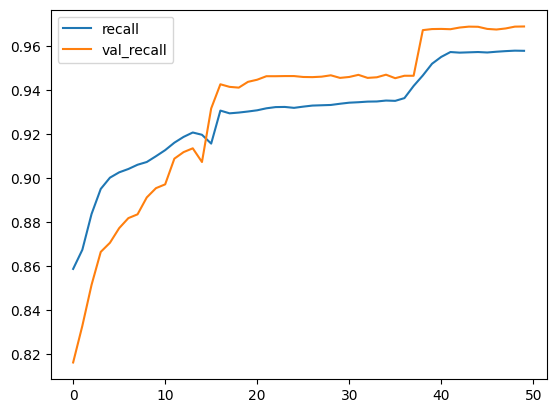

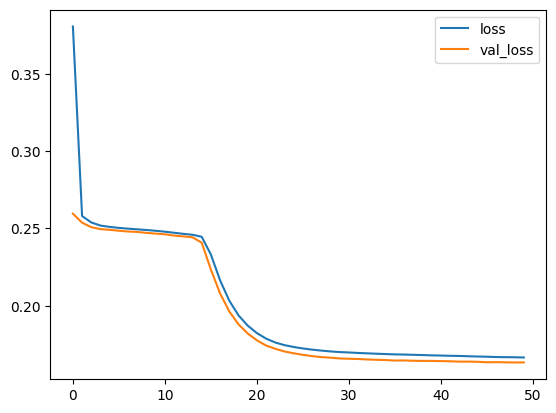

In [48]:
# Plot Training Results

history_seq_df[['recall', 'val_recall']].plot()
history_seq_df[['loss', 'val_loss']].plot()

We got a really good model at first using Sequential API already, returned with 0.95 Recall score in its validation set with around 0.16 loss. Let us try to improve the model further by changing the amount of hidden layers and neurons

In [49]:
# Improve Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(16, activation='relu', input_shape=(46,))) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=[tf.keras.metrics.Recall()])

model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                752       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


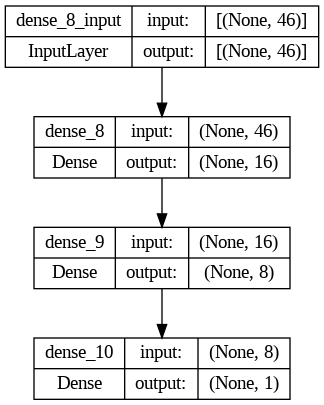

In [50]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

In [51]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe),
                                   callbacks=[early_stop])

Epoch 1/50
2673/2673 [==============================] - 16s 5ms/step - loss: 0.3149 - recall_2: 0.8377 - val_loss: 0.2573 - val_recall_2: 0.8216
Epoch 2/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2493 - recall_2: 0.8927 - val_loss: 0.2313 - val_recall_2: 0.8905
Epoch 3/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.2109 - recall_2: 0.9305 - val_loss: 0.1915 - val_recall_2: 0.9391
Epoch 4/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.1884 - recall_2: 0.9388 - val_loss: 0.1791 - val_recall_2: 0.9458
Epoch 5/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.1807 - recall_2: 0.9422 - val_loss: 0.1736 - val_recall_2: 0.9514
Epoch 6/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.1769 - recall_2: 0.9428 - val_loss: 0.1705 - val_recall_2: 0.9521
Epoch 7/50
2673/2673 [==============================] - 14s 5ms/step - loss: 0.1743 - recall_2: 0.9430 - val_loss: 0.1682 - val_re

<Axes: >

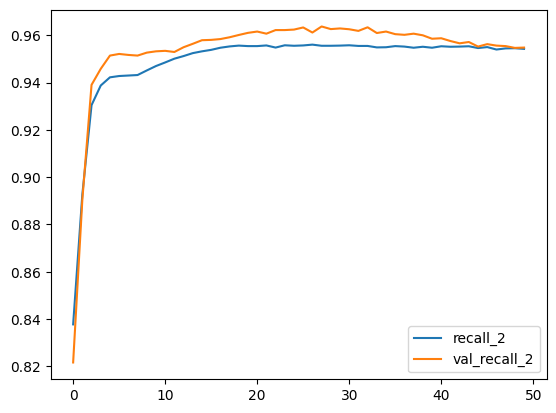

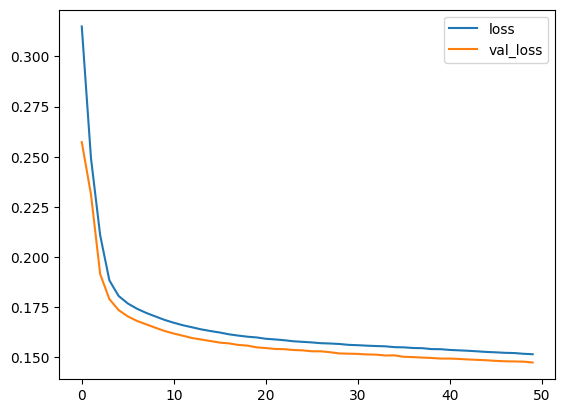

In [54]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)

# Plot Improvement Results

history_seq_df[['recall_2', 'val_recall_2']].plot()
history_seq_df[['loss', 'val_loss']].plot()

Looks like we managed to improve the model further with getting the same 0.95 Recall Score on the validation set with only 0.14 loss (before was 0.16), with the same runtime (2s faster on the new and improved model)

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2521
           1       0.93      0.93      0.93      3028

    accuracy                           0.92      5549
   macro avg       0.92      0.92      0.92      5549
weighted avg       0.92      0.92      0.92      5549



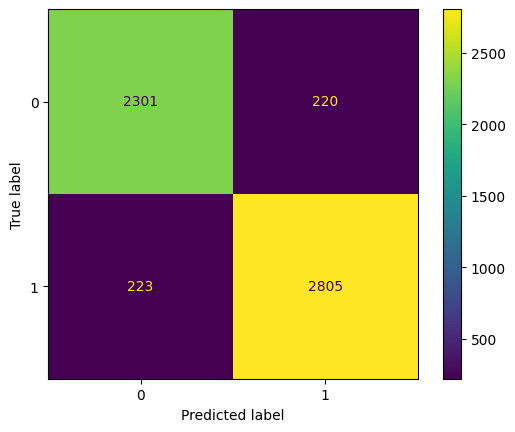

In [56]:
# Model Evaluation of test-set


y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))
cm = confusion_matrix(y_test, y_pred_seq, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()
plt.show()

With the test set, we got 0.93 Recall Score, meaning there around 7% or 223 data that has been predicted as False Negative.

I would say that this is a good fit model

### Functional API

In [57]:
# Create DataFrame

history_fun_df = pd.DataFrame(history_fun.history)
history_fun_df

,loss,recall_1,val_loss,val_recall_1
0,0.402968,0.832123,0.319461,0.793664
1,0.299097,0.844504,0.280439,0.822093
2,0.274896,0.872380,0.265596,0.847825
3,0.264191,0.891610,0.256314,0.871619
4,0.242495,0.910908,0.213820,0.913675
5,0.199270,0.935533,0.182594,0.935118
6,0.180864,0.940167,0.169947,0.948952
7,0.172466,0.942035,0.164421,0.951442
8,0.168202,0.943764,0.161178,0.954555
9,0.165792,0.945770,0.159358,0.954417


<Axes: >

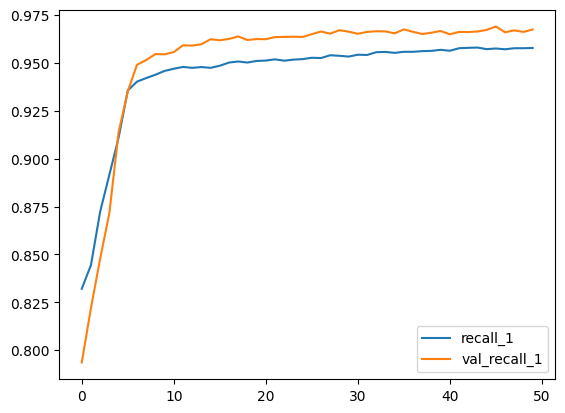

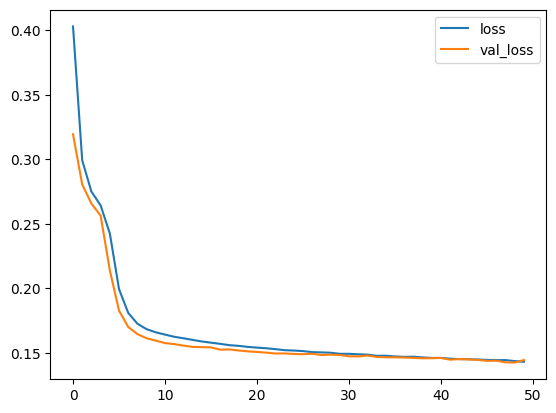

In [58]:
# Plot Training Results

history_fun_df[['recall_1', 'val_recall_1']].plot()
history_fun_df[['loss', 'val_loss']].plot()

We got a really good model at first using Functional API already, returned with 0.96 Recall score in its validation set with around 0.14 loss. Let us try to improve the model further by changing the amount of hidden layers and neurons

In [59]:
# Create Functional Model
input_layer = Input(shape=(46,))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(16, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(8, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(4, activation='relu')(hidden_layer_3)

concat_layer = concatenate([hidden_layer_2, hidden_layer_4])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=[tf.keras.metrics.Recall()])
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 32)           1504        ['input_2[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 16)           528         ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 8)            136         ['dense_12[0][0]']               
                                                                                            

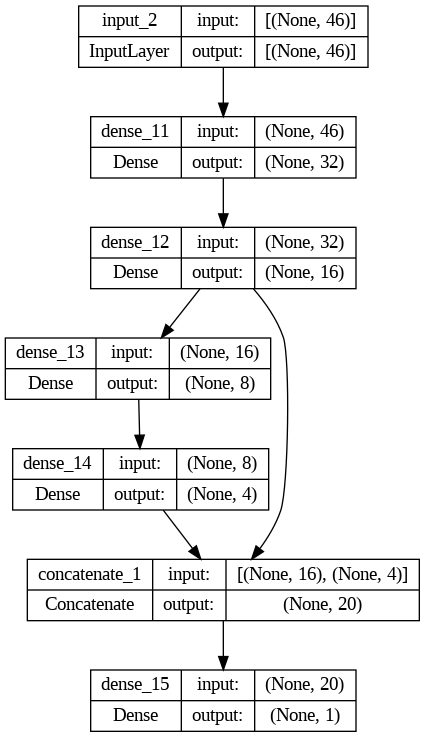

In [60]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

In [61]:
# Train the Model

%%time
history_fun = model_functional.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe),
                                   callbacks=[early_stop])

Epoch 1/50
2673/2673 [==============================] - 18s 6ms/step - loss: 0.2902 - recall_3: 0.8567 - val_loss: 0.2550 - val_recall_3: 0.8357
Epoch 2/50
2673/2673 [==============================] - 16s 6ms/step - loss: 0.2364 - recall_3: 0.9084 - val_loss: 0.1963 - val_recall_3: 0.9256
Epoch 3/50
2673/2673 [==============================] - 21s 8ms/step - loss: 0.1875 - recall_3: 0.9422 - val_loss: 0.1740 - val_recall_3: 0.9406
Epoch 4/50
2673/2673 [==============================] - 15s 6ms/step - loss: 0.1774 - recall_3: 0.9443 - val_loss: 0.1666 - val_recall_3: 0.9487
Epoch 5/50
2673/2673 [==============================] - 15s 6ms/step - loss: 0.1722 - recall_3: 0.9458 - val_loss: 0.1617 - val_recall_3: 0.9490
Epoch 6/50
2673/2673 [==============================] - 16s 6ms/step - loss: 0.1688 - recall_3: 0.9462 - val_loss: 0.1585 - val_recall_3: 0.9541
Epoch 7/50
2673/2673 [==============================] - 21s 8ms/step - loss: 0.1662 - recall_3: 0.9476 - val_loss: 0.1558 - val_re

<Axes: >

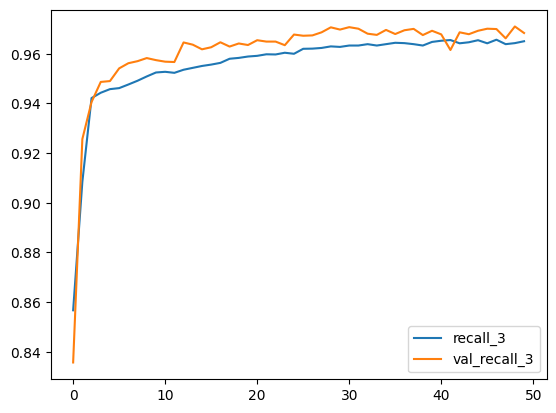

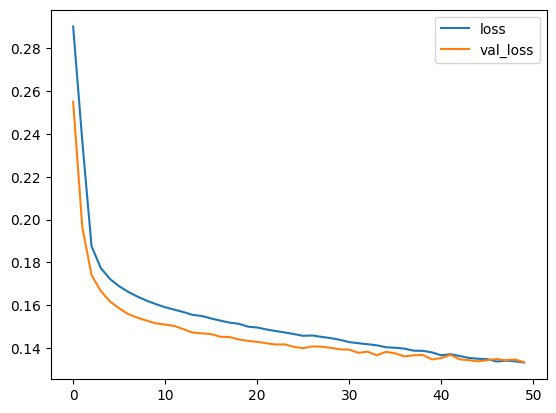

In [62]:
# Create DataFrame

history_fun_df = pd.DataFrame(history_fun.history)

# Plot Improvement Results

history_fun_df[['recall_3', 'val_recall_3']].plot()
history_fun_df[['loss', 'val_loss']].plot()

Looks like we managed to improve the model further with getting the same 0.96 Recall Score on the validation set with only 0.13 loss (before was 0.16), but it came with the cost of a slower running time for abour 1 minute. I still think that is a better model as we manage to decrease the loss in the model

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2521
           1       0.88      0.95      0.91      3028

    accuracy                           0.90      5549
   macro avg       0.91      0.90      0.90      5549
weighted avg       0.91      0.90      0.90      5549



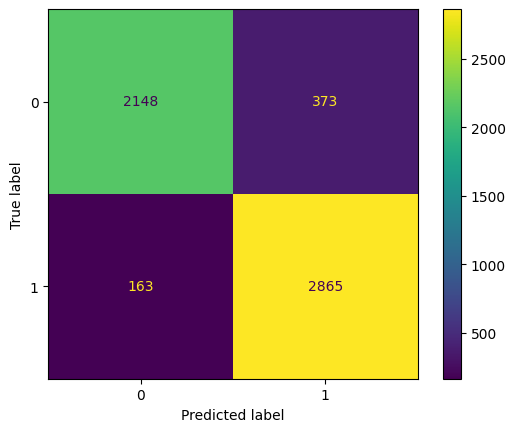

In [63]:
# Model Evaluation of test-set

y_pred_fun = model_functional.predict(X_test)
y_pred_fun = np.where(y_pred_fun >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_fun))
cm = confusion_matrix(y_test, y_pred_fun, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()
plt.show()

With the test set, we got 0.95 Recall Score, meaning there around 5% or 163 data that has been predicted as False Negative.

I would say that this is a good fit model and a little bit better than our Sequential Model, therefore this will be the model taht will be saved and used to predict customer churn

### Model Conclusion

- The original model that we created first have returned with good score aalready, but we still managed to improve the modelslightly by adjusting the amount of hidden layer within the model
- Our Final Model is our Functional Model that has been improved with only 5% False Negative Rate therefore we can confidently know which of our customers that will churn and focus on them and maybe create some new promotion targeted to them so they will not churn and stay using our services

## 9. Model Saving

In [64]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [65]:
# Freeze Model

model_functional.trainable = False
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 46)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 32)           1504        ['input_2[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 16)           528         ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 8)            136         ['dense_12[0][0]']               
                                                                                            

In [66]:
# Save ANN Model

model_functional.save('model.h5')

## 10. Model Inference

In [67]:
# Load the Models

with open('final_pipeline.pkl', 'rb') as file_1:
  model_pipeline = pickle.load(file_1)

model_ann = load_model('model.h5')

In [68]:
# Create New Data

import pandas as pd

data_inf = {
    'user_id': 'vfed15v1d56',
    'age': 23,
    'gender': 'M',
    'region_category': 'City',
    'membership_category': 'Gold Membership',
    'joining_date': '2017-04-19',
    'joined_through_referral': 'No',
    'preferred_offer_types': 'Without Offers',
    'medium_of_operation': 'Desktop',
    'internet_option': 'Fiber_Optic',
    'last_visit_time': '15:44:56',
    'days_since_last_login' : 16,
    'avg_time_spent' : 124.95,
    'avg_transaction_value' : 23495.95,
    'avg_frequency_login_days' : 20,
    'points_in_wallet' : 609.26,
    'used_special_discount' : 'No',
    'offer_application_preference' : 'No',
    'past_complaint' : 'Yes',
    'complaint_status' : 'Solved',
    'feedback' : 'Too many ads'
}

data_inf = pd.DataFrame([data_inf])
data_inf

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,vfed15v1d56,23,M,City,Gold Membership,2017-04-19,No,Without Offers,Desktop,Fiber_Optic,...,16,124.95,23495.95,20,609.26,No,No,Yes,Solved,Too many ads


In [69]:
# Transform Inference-Set

data_inf_transform = model_pipeline.transform(data_inf)
data_inf_transform

# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 84ms/step


array([[1]])

Based on our model prediction, the user with the data that we just put randomly turns out to be likely to churn

## 11. Conclusion

1. Based on EDA :    
- Users past experience regarding complaining about our products doesn't really affect their decision to churn or not, but we can more from their feedback whether they are likely to churn
- Maybe we can imrpove the perks of being a Basic Member as they have a very high percentages to churn. We can also promote a higher membership deals to user without membership so they more likely to not churn

2. Based on Model :    
- Our best model is the functional model with 5 Hidden Layers (including 1 concat layer). With the help of EarlyStopping callback, the model is a good fit, and returned with 0.95 Recall Score on the Test Set
- We managed to imrpove the model by a little bit, even with the cost of longer runtime.